 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [96]:
# Initialise imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

algo_returns.csv# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [97]:
# Set file path
whale_returns_path = Path("Resources/whale_returns.csv")

# Create a Pandas DataFrame from csv file
whale_df = pd.read_csv(whale_returns_path)

In [98]:
# Reading whale returns
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [99]:
# Count nulls
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [100]:
# Drop nulls
whale_df = whale_df.dropna().copy()

# Validate that nulls are dropped
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [101]:
# Drop duplicates
whale_df = whale_df.drop_duplicates().copy()

In [102]:
# show a sample to visualise data
whale_df.sample(5)

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
428,2016-10-28,0.000001,-0.011388,0.002802,0.006405
195,2015-12-02,-0.007471,-0.007103,-0.016163,0.011200
952,2018-11-23,0.001720,-0.000739,-0.001131,-0.009680
219,2016-01-07,-0.020495,-0.007167,-0.021324,-0.033944
24,2015-04-06,0.005368,0.003763,0.004631,0.004920


In [103]:
# set the date as index to df
whale_df = whale_df.set_index(pd.to_datetime(whale_df["Date"], infer_datetime_format = True))

# use head to visualise data
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [104]:
# delete duplicate date
whale_df = whale_df.drop(columns=["Date"])

In [105]:
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [106]:
# Reading algorithmic returns

    #Set file path
algo_path = Path("Resources/algo_returns.csv")

    # Create a Pandas DataFrame from csv file
algo_df = pd.read_csv(algo_path)
algo_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [107]:
# Count nulls
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [108]:
# Drop nulls
algo_df = algo_df.dropna().copy()

# confirm that nulls have been dropped
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [109]:
# set the date as index to df
algo_df = algo_df.set_index(pd.to_datetime(algo_df["Date"], infer_datetime_format = True))

In [110]:
# print head to visualise data
algo_df.head()

,Date,Algo 1,Algo 2
Date,,,
2014-06-05,2014-06-05,0.004062,0.013285
2014-06-06,2014-06-06,0.001857,0.008284
2014-06-09,2014-06-09,-0.005012,0.005668
2014-06-10,2014-06-10,0.004406,-0.000735
2014-06-11,2014-06-11,0.004760,-0.003761


In [111]:
# delete duplicate dates
algo_df = algo_df.drop(columns=["Date"])

In [112]:
# print head to visualise data
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [113]:
# Reading S&P TSX 60 Closing Prices

    #Set file path
sp_tsx_path = Path("Resources/sp_tsx_history.csv")

    # Create a Pandas DataFrame from csv file
sp_tsx_df = pd.read_csv(sp_tsx_path)
sp_tsx_df.head()

# Drop nulls
sp_tsx_df = sp_tsx_df.dropna().copy()

# confirm that nulls have been dropped

sp_tsx_df.isnull().sum()

Date     0
Close    0
dtype: int64

In [114]:
# Clean Close by replacing $
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$", "")
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",", "")

/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [115]:
sp_tsx_df["Close"]

0       12370.19
1       12391.23
2       12359.47
3       12447.68
4       12418.99
          ...   
1813    17118.44
1814    17128.71
1815    17180.15
1816    17168.21
1817    17098.56
Name: Close, Length: 1818, dtype: object

In [116]:
# Check Data Types
sp_tsx_df["Close"].dtype

dtype('O')

In [117]:
# sort data from in ascending order
sp_tsx_df.sort_index()

,Date,Close
0,1-Oct-2012,12370.19
1,2-Oct-2012,12391.23
2,3-Oct-2012,12359.47
3,4-Oct-2012,12447.68
4,5-Oct-2012,12418.99
...,...,...
1813,20-Dec-2019,17118.44
1814,23-Dec-2019,17128.71
1815,24-Dec-2019,17180.15
1816,27-Dec-2019,17168.21


In [118]:
# Fix Data Types
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype("float")

In [119]:
# set the date as index to df
sp_tsx_df = sp_tsx_df.set_index(pd.to_datetime(sp_tsx_df["Date"], infer_datetime_format = True))
sp_tsx_df.head()

,Date,Close
Date,,
2012-10-01,1-Oct-2012,12370.19
2012-10-02,2-Oct-2012,12391.23
2012-10-03,3-Oct-2012,12359.47
2012-10-04,4-Oct-2012,12447.68
2012-10-05,5-Oct-2012,12418.99


In [120]:
# Delete duplicate date column
sp_tsx_df = sp_tsx_df.drop(columns=["Date"])

In [121]:
# Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx_df.pct_change()

In [122]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns = sp_tsx_daily_returns.rename(columns={"Close":"S&P TSX 60"})

In [123]:
sp_tsx_daily_returns.head()

,S&P TSX 60
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [137]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_daily_returns = pd.concat([whale_df, algo_df, sp_tsx_daily_returns], axis="columns", join="inner")

# Show sample data
combined_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

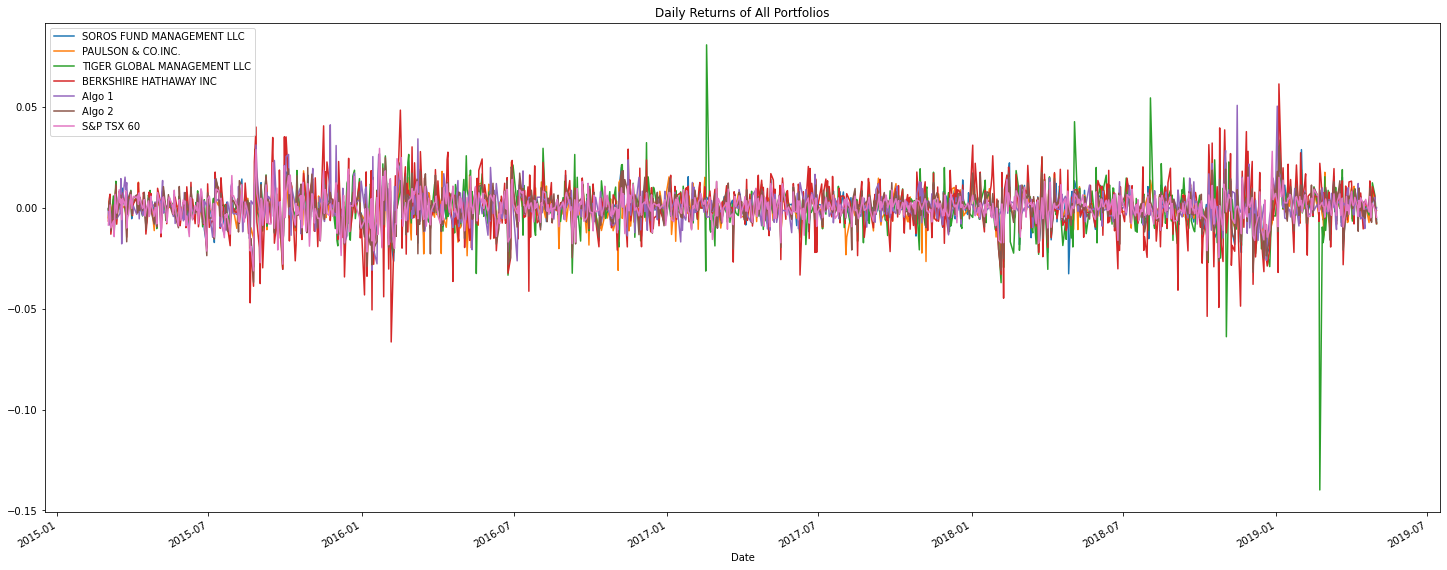

In [125]:
# Plot daily returns of all portfolios
combined_daily_returns.plot(figsize=(25,10), title = "Daily Returns of All Portfolios");

#### Calculate and Plot cumulative returns.

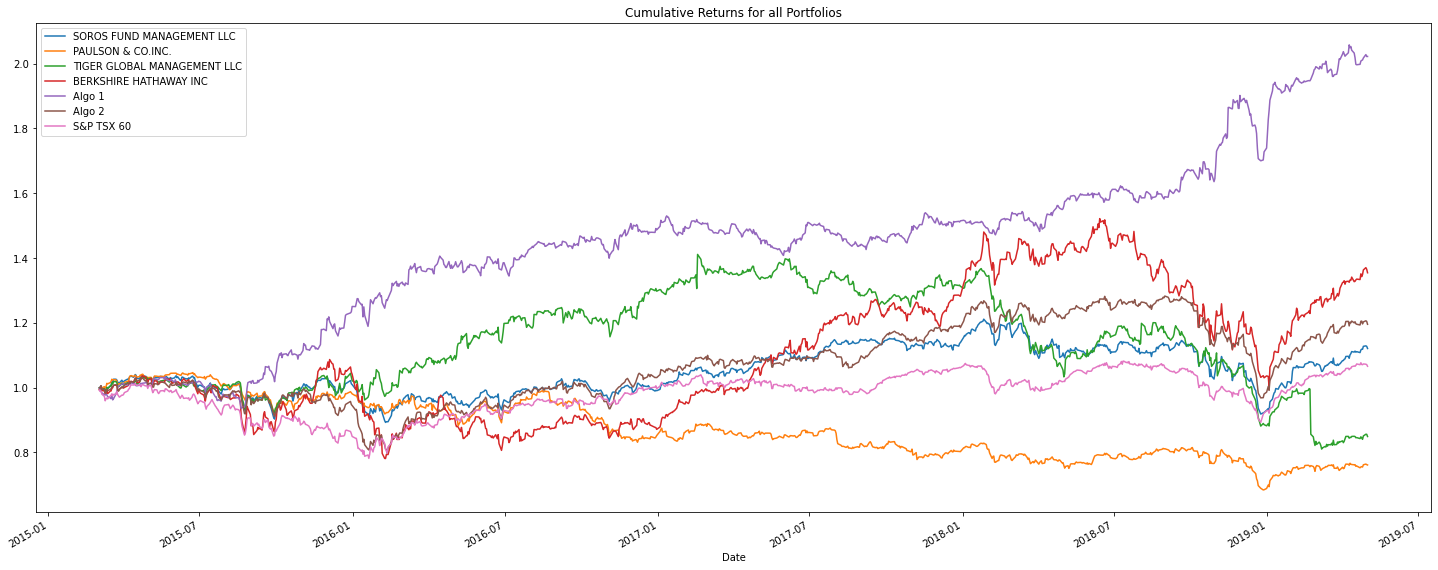

In [138]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1+combined_daily_returns).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(25,10), title = "Cumulative Returns for all Portfolios");

### Does any portfolio outperform the S&P TSX 60?
Yes, upon observation, all except Paulso & Co Inc and Tiger Clobal Management LLC have outperformed the S&P TSX 60.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


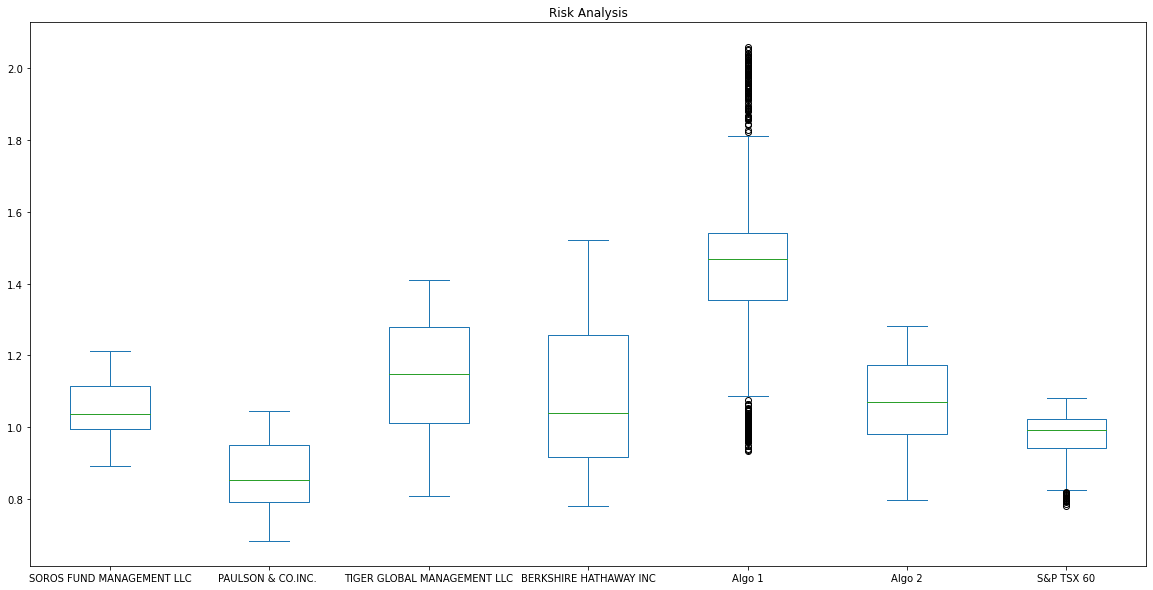

In [127]:
# Box plot to visually show risk

cumulative_returns.plot.box(figsize=(20,10), title = "Risk Analysis");

### Calculate Standard Deviations

In [128]:
# Calculate the daily standard deviations of all portfolios
combined_daily_returns_std = combined_daily_returns.std()

# print combined_daily_returns_std to visualise data
combined_daily_returns_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60                     0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60
Based on the below, Algo 1, SOROS FUND MANAGEMENT LLC, Algo 2, TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC are riskier than the S&P TSX 60.

In [129]:
# Calculate the daily standard deviation of S&P TSX 60 and print to visualise data
daily_std_tsx = combined_daily_returns["S&P TSX 60"].std()
print(daily_std_tsx)

# Determine which portfolios are riskier than the S&P TSX 60
combined_daily_returns_std.sort_values()

0.007034167748577725


PAULSON & CO.INC.              0.006982
S&P TSX 60                     0.007034
Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized standard deviation (252 trading days)
annual_std_tsx = daily_std_tsx*np.sqrt(252)
annual_std_tsx

0.11166395125828665

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation'}, xlabel='Date'>

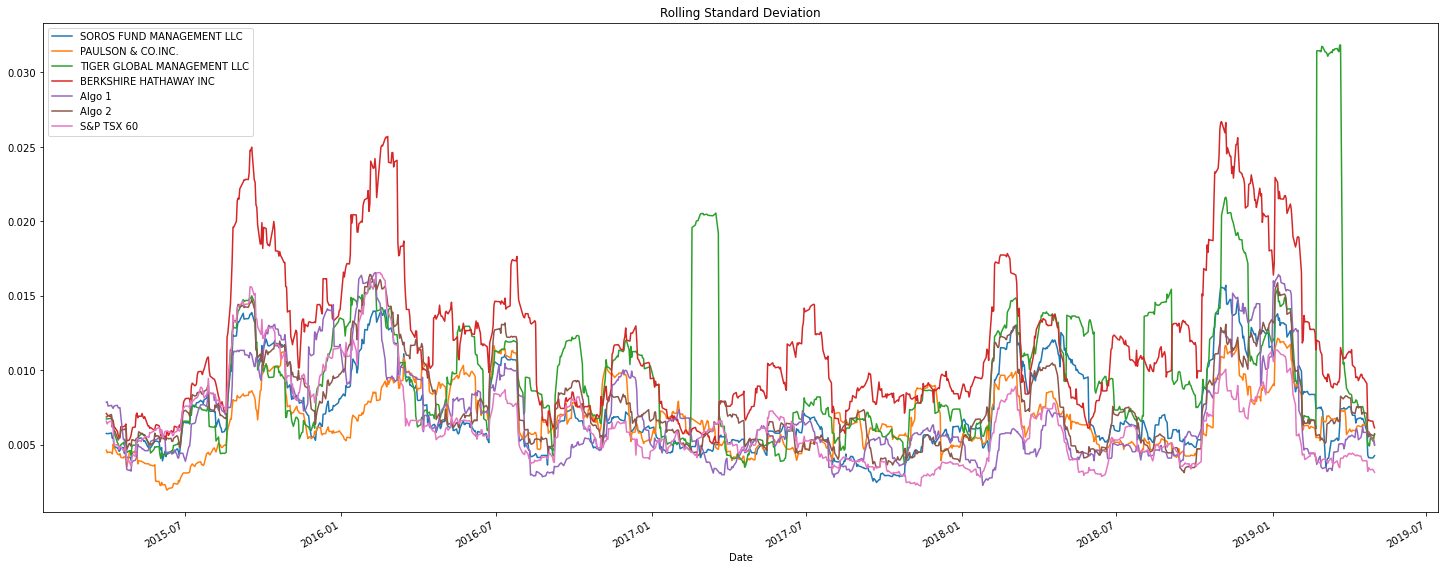

In [37]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

day_21_std = combined_daily_returns.rolling(window=21).std()

# Plot the rolling standard deviation

combined_daily_returns.rolling(window=21).std().plot(figsize=(25,10), title = "Rolling Standard Deviation")

### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


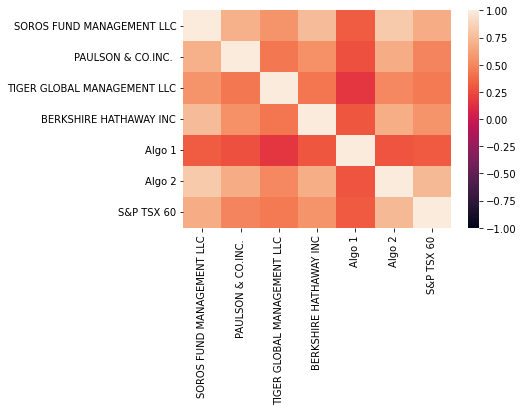

In [38]:
# Calculate the correlation
correlation = combined_daily_returns.corr()

# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

# sum total correlation for each portfolio

correlation.sum(axis=0).sort_values()

correlation

### Determine which prortfolios may minikc the S&P TSX 60
Algo 2 and Soros Fund Management LLC have the strongest correlation with the S&P TSX 60

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

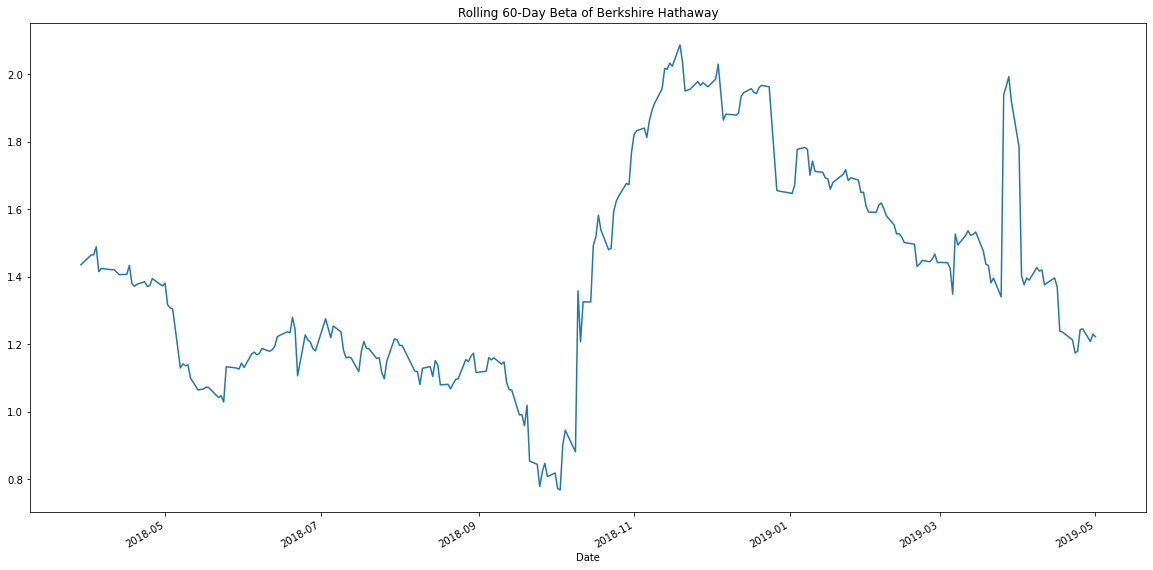

In [136]:
# Calculate covariance of a single portfolio
covariance = combined_daily_returns["BERKSHIRE HATHAWAY INC"].cov(combined_daily_returns["S&P TSX 60"])

# Calculate variance of S&P TSX
variance = combined_daily_returns["S&P TSX 60"].var()

# Computing beta
berkshire_beta = covariance/variance
berkshire_beta

# Plot beta trend
rolling_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['S&P TSX 60'])
rolling_variance = combined_df['S&P TSX 60'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Berkshire Hathaway');

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Expotentially Weighted Average'}, xlabel='Date'>

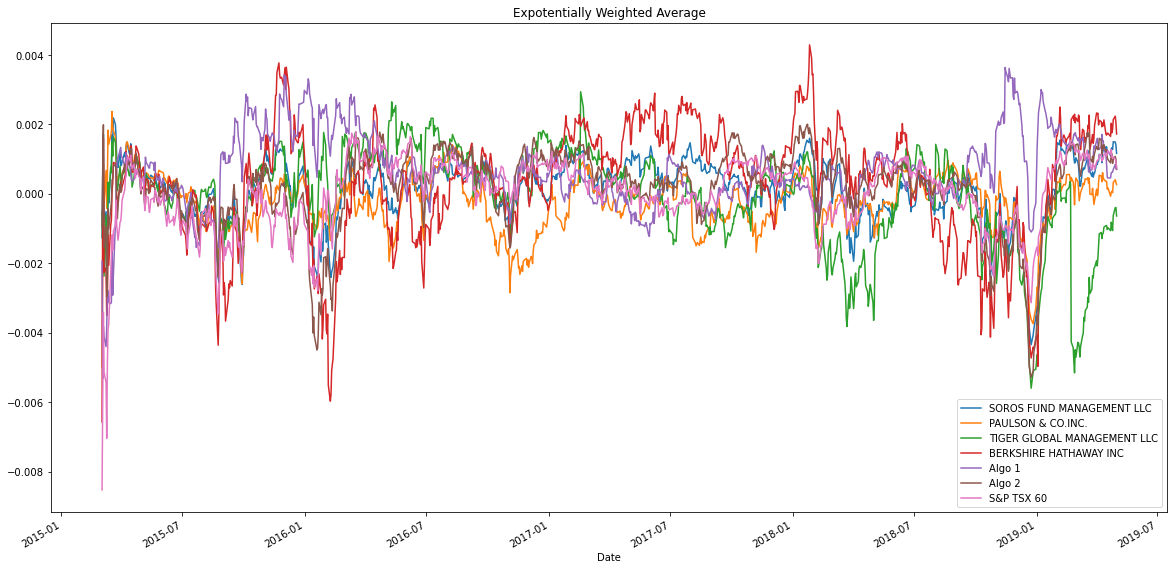

In [41]:
# Use `ewm` to calculate the rolling window

rolling_ewm = combined_daily_returns.ewm(halflife = 21).mean()
rolling_ewm.plot(figsize = (20,10), title = "Expotentially Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Annualized Sharpe Ratios
annualised_sharpe_ratios = (combined_daily_returns.mean()*252)/ annual_std_tsx

annualised_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.319048
PAULSON & CO.INC.             -0.543558
TIGER GLOBAL MANAGEMENT LLC   -0.223491
BERKSHIRE HATHAWAY INC         0.851571
Algo 1                         1.609135
Algo 2                         0.469713
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios for Daily Returns'}>

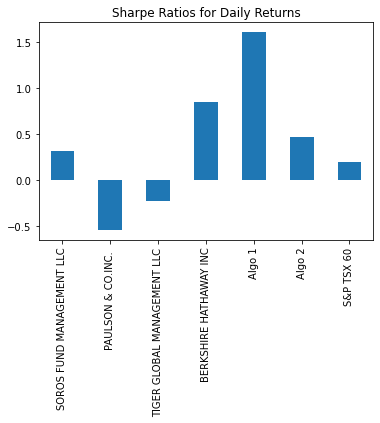

In [43]:
# Visualize the sharpe ratios as a bar plot

annualised_sharpe_ratios.plot.bar(title="Sharpe Ratios for Daily Returns")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Overall algorithmic strategies have outperformed the market. Algo 1 has outperformed both the market (S&P TSX 60) and the whales portfolios. However, Algo 2 has outperformed the market and the whales portfoils, with the excpetion of Berkshire Hathaway.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [76]:
# Reading data from 1st stock
# Reset Date index

shop_data_path = Path("Resources/shop_historical.csv")
shop_df = pd.read_csv(shop_data_path)
shop_df = shop_df.set_index(pd.to_datetime(shop_df["Date"], infer_datetime_format = True))
shop_df = shop_df.drop(columns=["Symbol", "Date"])

In [77]:
shop_df.tail()

,Close
Date,
2019-12-20,513.22
2019-12-23,511.62
2019-12-24,525.39
2019-12-27,534.76
2019-12-30,517.79


In [78]:
# Reading data from 2nd stock
# Reset Date index

otex_data_path = Path("Resources/otex_historical.csv")
otex_df = pd.read_csv(otex_data_path)
otex_df = otex_df.set_index(pd.to_datetime(otex_df["Date"], infer_datetime_format = True))
otex_df = otex_df.drop(columns=["Symbol", "Date"])
otex_df

,Close
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16
...,...
2019-12-20,58.68
2019-12-23,57.89
2019-12-24,57.44


In [79]:
# Reading data from 3rd stock
# Reset Date index
l_data_path = Path("Resources/l_historical.csv")
l_df = pd.read_csv(l_data_path)
l_df = l_df.set_index(pd.to_datetime(l_df["Date"], infer_datetime_format = True))
l_df = l_df.drop(columns=["Symbol", "Date"])

In [80]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([shop_df, otex_df, l_df], axis="columns", join="inner")
combined_stocks

,Close,Close,Close
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
...,...,...,...
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67


In [81]:
# Reorganize portfolio data by having a column per symbol
combined_stocks.columns=["Shop", "Otex", "L"]
combined_stocks

,Shop,Otex,L
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
...,...,...,...
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67


In [82]:
# Calculate daily returns

my_combined_daily_returns = combined_stocks.pct_change()

# Drop NANs
my_combined_daily_returns = my_combined_daily_returns.dropna().copy()
my_combined_daily_returns.isnull().sum()

# Display sample data
my_combined_daily_returns.sample(5)

,Shop,Otex,L
Date,,,
2019-08-26,0.031333,-0.005848,0.003099
2019-10-22,-0.062243,-0.014737,-0.009101
2019-06-03,-0.043029,-0.024004,0.001009
2019-04-09,0.020269,0.008830,0.000301
2019-07-25,0.012577,0.004869,0.005873


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [83]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

my_portfolio_returns = my_combined_daily_returns.dot(weights)

# Display sample data
my_portfolio_returns.tail()

Date
2019-12-20    0.007495
2019-12-23   -0.006607
2019-12-24    0.006331
2019-12-27    0.007995
2019-12-30   -0.015737
dtype: float64

In [84]:
my_portfolio_returns.tail()

Date
2019-12-20    0.007495
2019-12-23   -0.006607
2019-12-24    0.006331
2019-12-27    0.007995
2019-12-30   -0.015737
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [85]:
# Join your returns DataFrame to the original returns DataFrame
combined_df = pd.concat([my_portfolio_returns, combined_daily_returns], axis = "columns", join = "inner")

In [86]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df = combined_df.dropna().copy()

In [87]:
# rename first column
combined_df.rename(columns = {0:"My Portfolio"}, inplace = True)
combined_df

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...
2019-04-25,0.003461,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.003243,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.003303,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [88]:
# Calculate the annualized `std`

portfolio_std = combined_df.std()*np.sqrt(252)
portfolio_std.columns=["std"]
portfolio_std.sort_values()

S&P TSX 60                     0.099121
PAULSON & CO.INC.              0.114343
Algo 1                         0.120028
Algo 2                         0.137664
SOROS FUND MANAGEMENT LLC      0.145675
TIGER GLOBAL MANAGEMENT LLC    0.219833
My Portfolio                   0.224346
BERKSHIRE HATHAWAY INC         0.227445
dtype: float64

### Calculate and plot rolling `std` with 21-day window

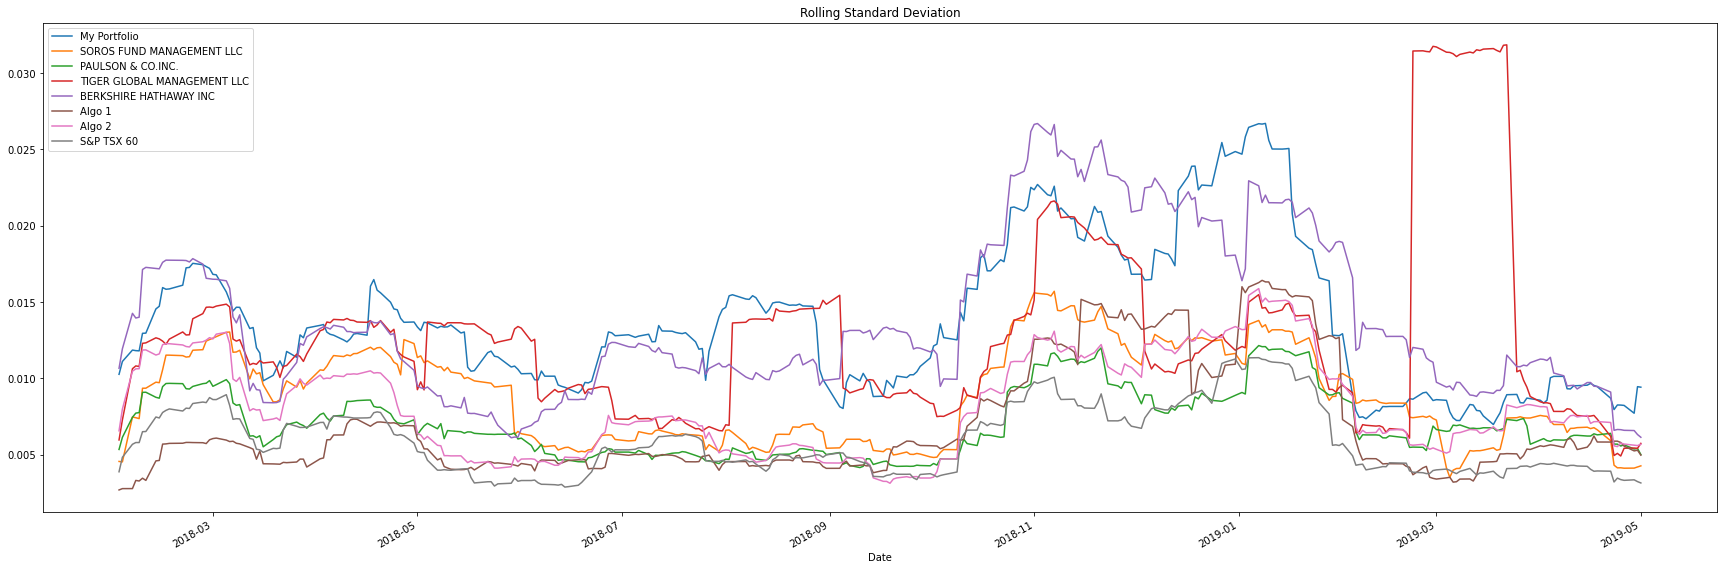

In [89]:
# Calculate rolling standard deviation

rolling_std_21 = combined_df.rolling(window=21).std()

# Plot rolling standard deviation

rolling_std_21.plot(figsize=(30,10), title = "Rolling Standard Deviation");

In [90]:
print(rolling_std_21)

            My Portfolio  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                                      
2018-01-03           NaN                        NaN                 NaN   
2018-01-04           NaN                        NaN                 NaN   
2018-01-05           NaN                        NaN                 NaN   
2018-01-08           NaN                        NaN                 NaN   
2018-01-09           NaN                        NaN                 NaN   
...                  ...                        ...                 ...   
2019-04-25      0.008253                   0.004145            0.005572   
2019-04-26      0.008231                   0.004117            0.005649   
2019-04-29      0.007718                   0.004123            0.005374   
2019-04-30      0.009458                   0.004199            0.005408   
2019-05-01      0.009425                   0.004271            0.005009   

            TIGER GLOBAL

### Calculate and plot the correlation

In [91]:
# Calculate the correlation
my_correlation = combined_df.corr().loc[:, "My Portfolio"]
my_correlation[my_correlation == my_correlation[my_correlation<1].max()]

BERKSHIRE HATHAWAY INC    0.647413
Name: My Portfolio, dtype: float64

My portfolio has a strong positive correlation with BERKSHIRE HATHAWAY INC

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

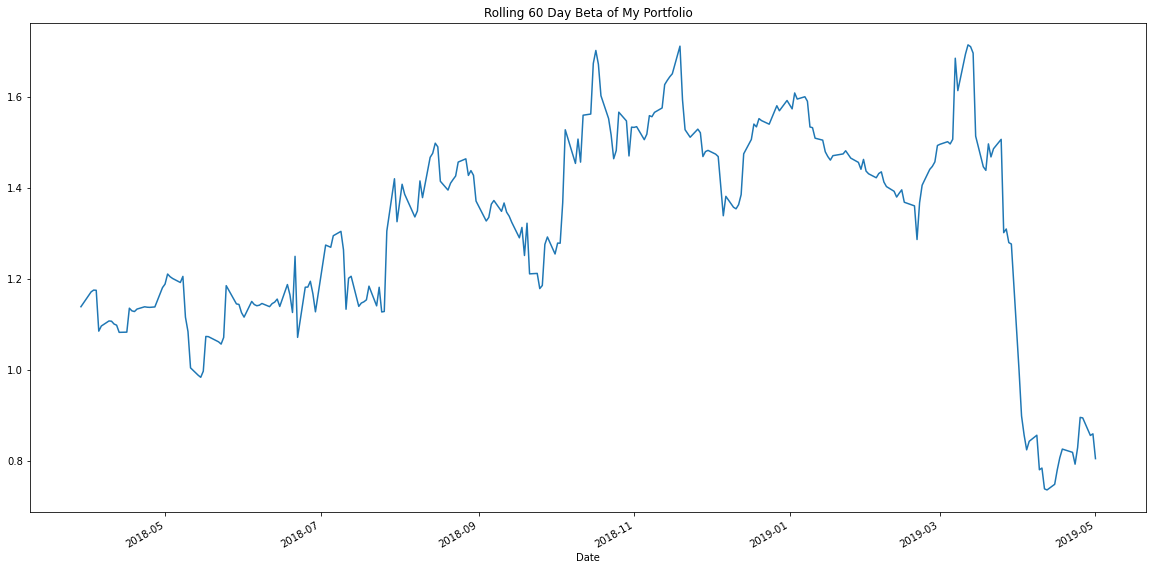

In [93]:
# Calculate and plot Beta

rolling_cov =combined_df["My Portfolio"].rolling(window=60).cov(combined_df["S&P TSX 60"])
rolling_var = combined_df["S&P TSX 60"].rolling(window=60).var()
rolling_beta = rolling_cov/rolling_var
rolling_beta.plot(figsize=(20,10), title = "Rolling 60 Day Beta of My Portfolio");

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [94]:
# Calculate Annualized Sharpe Ratios
trading_days = combined_df.count()
my_sharpe_ratios = combined_df.mean()*trading_days/(combined_df.std()*np.sqrt(trading_days))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

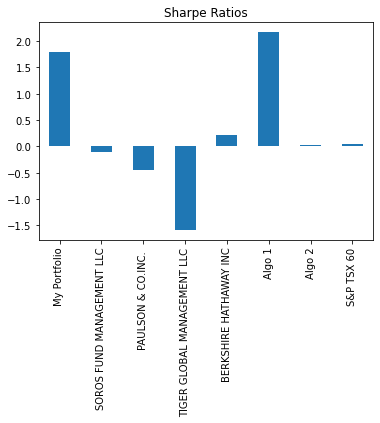

In [95]:
# Visualize the sharpe ratios as a bar plot
my_sharpe_ratios.plot.bar(title="Sharpe Ratios")

### How does your portfolio do?

My Portfolio performs okay, outperforming the S&P TSX 60. However, falling short of Algo 1